---
# Imports

In [1]:
# current filepath system leaves plenty to be desired
import sys
local_path = '/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/'
sys.path.insert(0, local_path)

# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
# from utils.tidy import *
# from utils.model import *


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


---
# Quiz

In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/zgulde/b1cc93bf8bb4140ace71e0a3e44b8dcb/raw/17b5ac23c86baed88baf2c01b49d4913963f7cf2/data.csv')

In [3]:
df.head()

,web_browser,water_ml,coffee_ml,pet,favorite_color
0,Edge,1460.908387,1215.178520,dog,beige
1,Firefox,1518.863237,1401.531823,cat,navy
2,Edge,1219.323161,1726.410266,hamster,bisque
3,Opera,1068.023818,2860.242041,hamster,midnightblue
4,Safari,890.031813,933.430086,hamster,gainsboro


In [7]:
df[df.web_browser=='Chrome'].describe()

,water_ml,coffee_ml
count,12973.000000,12973.000000
mean,1500.728759,1609.381064
std,250.770173,798.470218
min,478.022749,0.000000
25%,1330.831325,1849.806498
50%,1499.350729,1968.440345
75%,1671.373552,2050.635132
max,2536.881493,2408.021308


In [10]:
df.web_browser.value_counts()

Edge       13429
Safari     13237
Opera      13098
Firefox    12988
Chrome     12973
Name: web_browser, dtype: int64

In [14]:
df[df.coffee_ml==0].web_browser.value_counts()

Firefox    2630
Edge       2629
Safari     2616
Opera      2571
Chrome     2536
Name: web_browser, dtype: int64

In [20]:
df[df.coffee_ml<1000].pet.isna().sum()

1893

In [24]:
df[df.pet=='hamster'].favorite_color.value_counts()

orchid                  111
green                   110
violet                  109
gainsboro               107
bisque                  106
dimgray                 106
lightpink               106
gray                    105
snow                    105
linen                   103
skyblue                 103
darkslateblue           102
lavender                102
lightgoldenrodyellow    102
blanchedalmond          101
ivory                   100
slateblue               100
lawngreen               100
darkgray                100
seashell                100
mediumseagreen           99
darkgreen                99
brown                    99
rosybrown                99
lightgrey                99
coral                    98
cyan                     98
seagreen                 98
navajowhite              98
aliceblue                98
red                      98
limegreen                98
olive                    98
maroon                   98
azure                    97
mediumspringgreen   

In [32]:
print(df[df.favorite_color=='crimson'].coffee_ml.median())
print(df[df.favorite_color=='pink'].coffee_ml.median())
print(df[df.favorite_color=='lavender'].coffee_ml.median())

1438.9847194920067
1494.2606149535568
1468.7936182905446


In [49]:
s=df.coffee_ml
k=1.5
q1, q3 = s.quantile([.25, .75])
iqr = q3 - q1
upper_bound = q3 + k * iqr


3468.6120616596595

In [51]:
(df.coffee_ml>upper_bound).sum()

74

In [60]:
df.pet=df.pet.fillna('no_pet')

In [74]:
df.groupby(['pet','favorite_color','web_browser']).mean().water_ml.idxmin()

('no_pet', 'darkgoldenrod', 'Firefox')

In [82]:
position=df.groupby(['pet','favorite_color','web_browser']).mean().water_ml.idxmin()
df.groupby(['pet','favorite_color','web_browser']).mean().loc[position]

water_ml     1186.747830
coffee_ml    1576.599178
Name: (no_pet, darkgoldenrod, Firefox), dtype: float64

[Text(0.5, 1.0, 'Average Coffee Consumption by Web Browser Used'),
 Text(0.5, 0, 'Web Browser Used'),
 Text(0, 0.5, 'Average Coffe Consumption [ml]')]

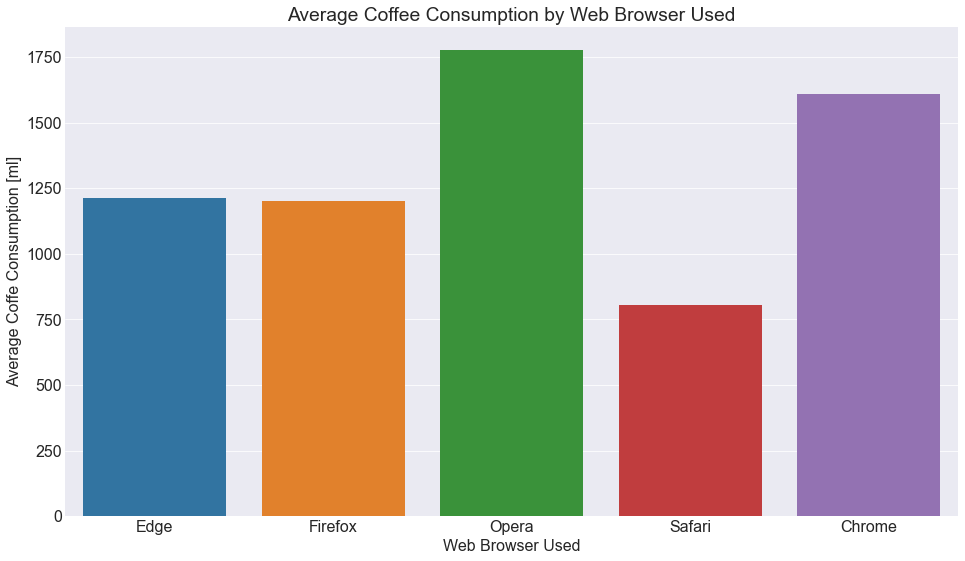

In [95]:
sns.barplot(data=df,x='web_browser',y='coffee_ml',ci=None).set(title='Average Coffee Consumption by Web Browser Used',xlabel='Web Browser Used', ylabel='Average Coffee Consumption [ml]')

[Text(0.5, 1.0, 'Average Coffee Consumption by Web Browser Used'),
 Text(0.5, 0, 'Web Browser Used'),
 Text(0, 0.5, 'Average Coffee Consumption [ml]')]

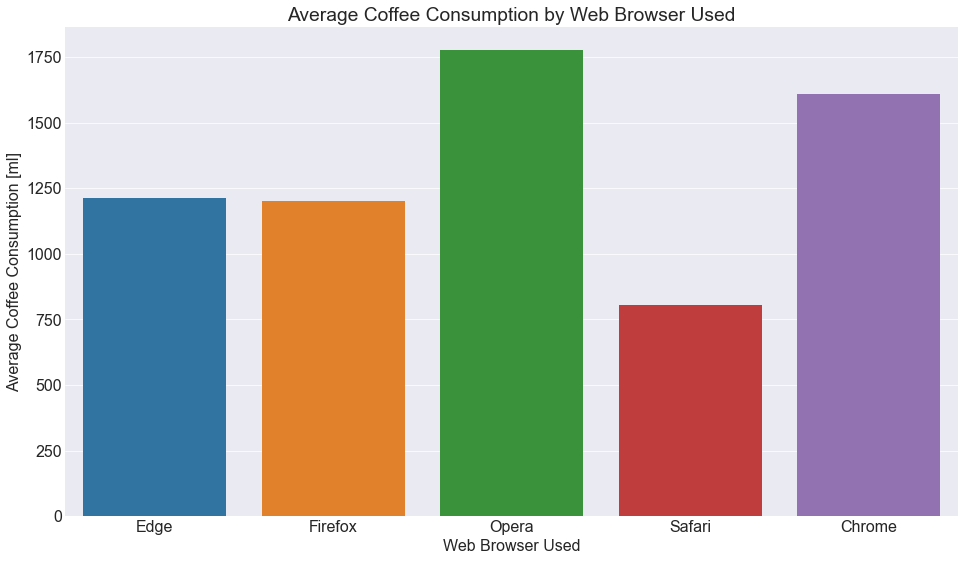

In [96]:
sns.barplot(data=df,x='web_browser',y='coffee_ml',ci=None).set(title='Average Coffee Consumption by Web Browser Used',xlabel='Web Browser Used', ylabel='Average Coffee Consumption [ml]')